In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [3]:
# create a dataset  weight(gm) size (cm)
X = np.array([
    [100,5], # apple
    [110,4], # apple
    [90,5.5], # apple
    [150,7], # orange
    [140,6], #orange
    [160,7.5], #orange
])

y = np.array([0,0,0,1,1,1]) # 0 apple 1 orange

In [4]:
# step no 2  train SVM (linear kernel ) , soft margin
model = svm.SVC(kernel='linear',C=1.0) # c = 1.0 allows some  errors 
model.fit(X,y)

SVC(kernel='linear')

In [5]:
# get hyperplan and support vector
support_vectors = model.support_vectors_ # closest points 
w = model.coef_[0]
b = model.intercept_[0] # bias 


new fruit [[150.    7.5]] is Orange


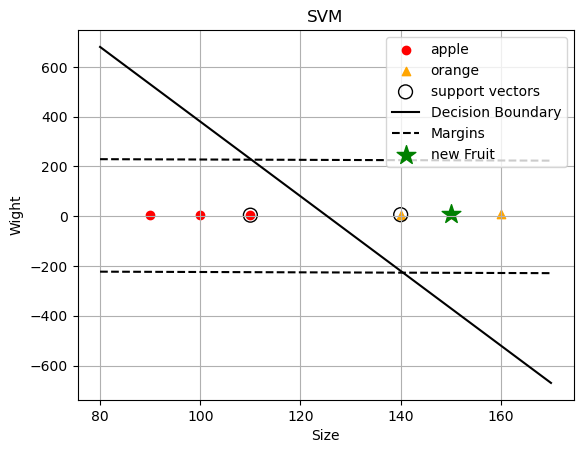

In [16]:
# step no 4 plot data , boundary , margins , SV
plt.scatter(X[y == 0][:, 0],X[y == 0][:, 1],color='red',label='apple',marker='o')
plt.scatter(X[y==1][:, 0],X[y == 1][:, 1],color='orange',label='orange',marker='^')
# highlight SV
plt.scatter(support_vectors[:, 0],support_vectors[:, 1],s=100 , facecolors='none', 
            edgecolors='black',label='support vectors')

# plot decision boundary w0*w0 + w1*x1 + b = 0
x0 = np.linspace(80,170,100) # weight range
x1 = -(w[0] * x0 + b)/w[1] # size
plt.plot(x0,x1, 'k-', label = 'Decision Boundary') 
 
# plot margins  w0*w0 + w1*x1 + b = +1/-1
x1_margin1 = -(w[0] * x0 + b - 1 /w[1]) # upper margin
x1_margin2 = -(w[0] * x0 + b + 1 /w[1]) # lower margin

plt.plot(x0,x1_margin1 , 'k--',label='Margins')
plt.plot(x0,x1_margin2 , 'k--')

# predict a new fruit
new_fruit = np.array([[150,7.5]])
prediction = model.predict(new_fruit)
print(f'new fruit {new_fruit} is {'Apple' if prediction[0] == 0 else 'Orange'}')

plt.scatter(new_fruit[:, 0],new_fruit[:, 1],color='green',marker='*',s=200,label='new Fruit')
plt.ylabel('Wight')
plt.xlabel('Size')
plt.title('SVM')
plt.legend()
plt.grid(True)
plt.show()
